In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())

from CrossPlatformDev import my_print, join_str

import time

C:\Users\quekz\PycharmProjects\AAM_Sim


In [2]:
from MonteCarlo.TwoAircraftEncounter.ScenarioMP import simulate_encounter_debug


run = 0

start = time.time()
AC1_GT_Trajectory, AC2_GT_Trajectory, AC1_Trk_Trajectory, AC2_Trk_Trajectory, AC1_WPTs, AC2_WPTs = simulate_encounter_debug(run)


end = time.time()
compute_time = end-start
simulated_time = AC1_GT_Trajectory.iloc[-1]['time'] + AC2_GT_Trajectory.iloc[-1]['time']
speedup = simulated_time/compute_time

print('Simulation took: %.3f sec, simulated flight time: %.3f sec, total speedup: %.3f times'
      %(compute_time, simulated_time, speedup))

CHANGE FLIGHT LEG
Next Wpt is:  [-263.41003088 -294.59939315    0.        ]
Hdg is:  [-185.38676474 -207.33769404    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-843.41336063  288.04528968    0.        ]
Hdg is:  [-515.66426895  176.11134784    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-1359.07762958   464.15663752     0.        ]
Hdg is:  [-515.66426895  176.11134784    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-448.79679561 -501.93708719    0.        ]
Hdg is:  [-185.38676474 -207.33769404    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-634.18356035 -709.27478123    0.        ]
Hdg is:  [-185.38676474 -207.33769404    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-1874.74189852   640.26798536     0.        ]
Hdg is:  [-515.66426895  176.11134784    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-2390.40616747   816.37933319     0.        ]
Hdg is:  [-515.66426895  176.11134784    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-819.57032508 -916.61247527    0.        ]
Hdg is:  [-1

In [3]:
def special_concat(trajectory):
    return np.concatenate(trajectory).reshape(len(trajectory), 8) # 8 is the length of each mini array

def extract_from_df(df, key, idx):
    """Extracts single column from df cells with 3D point values. """
    df_len = len(df)
    return np.concatenate(df[key].to_numpy()).reshape(df_len, 3)[:,idx]

<IPython.core.display.Javascript object>


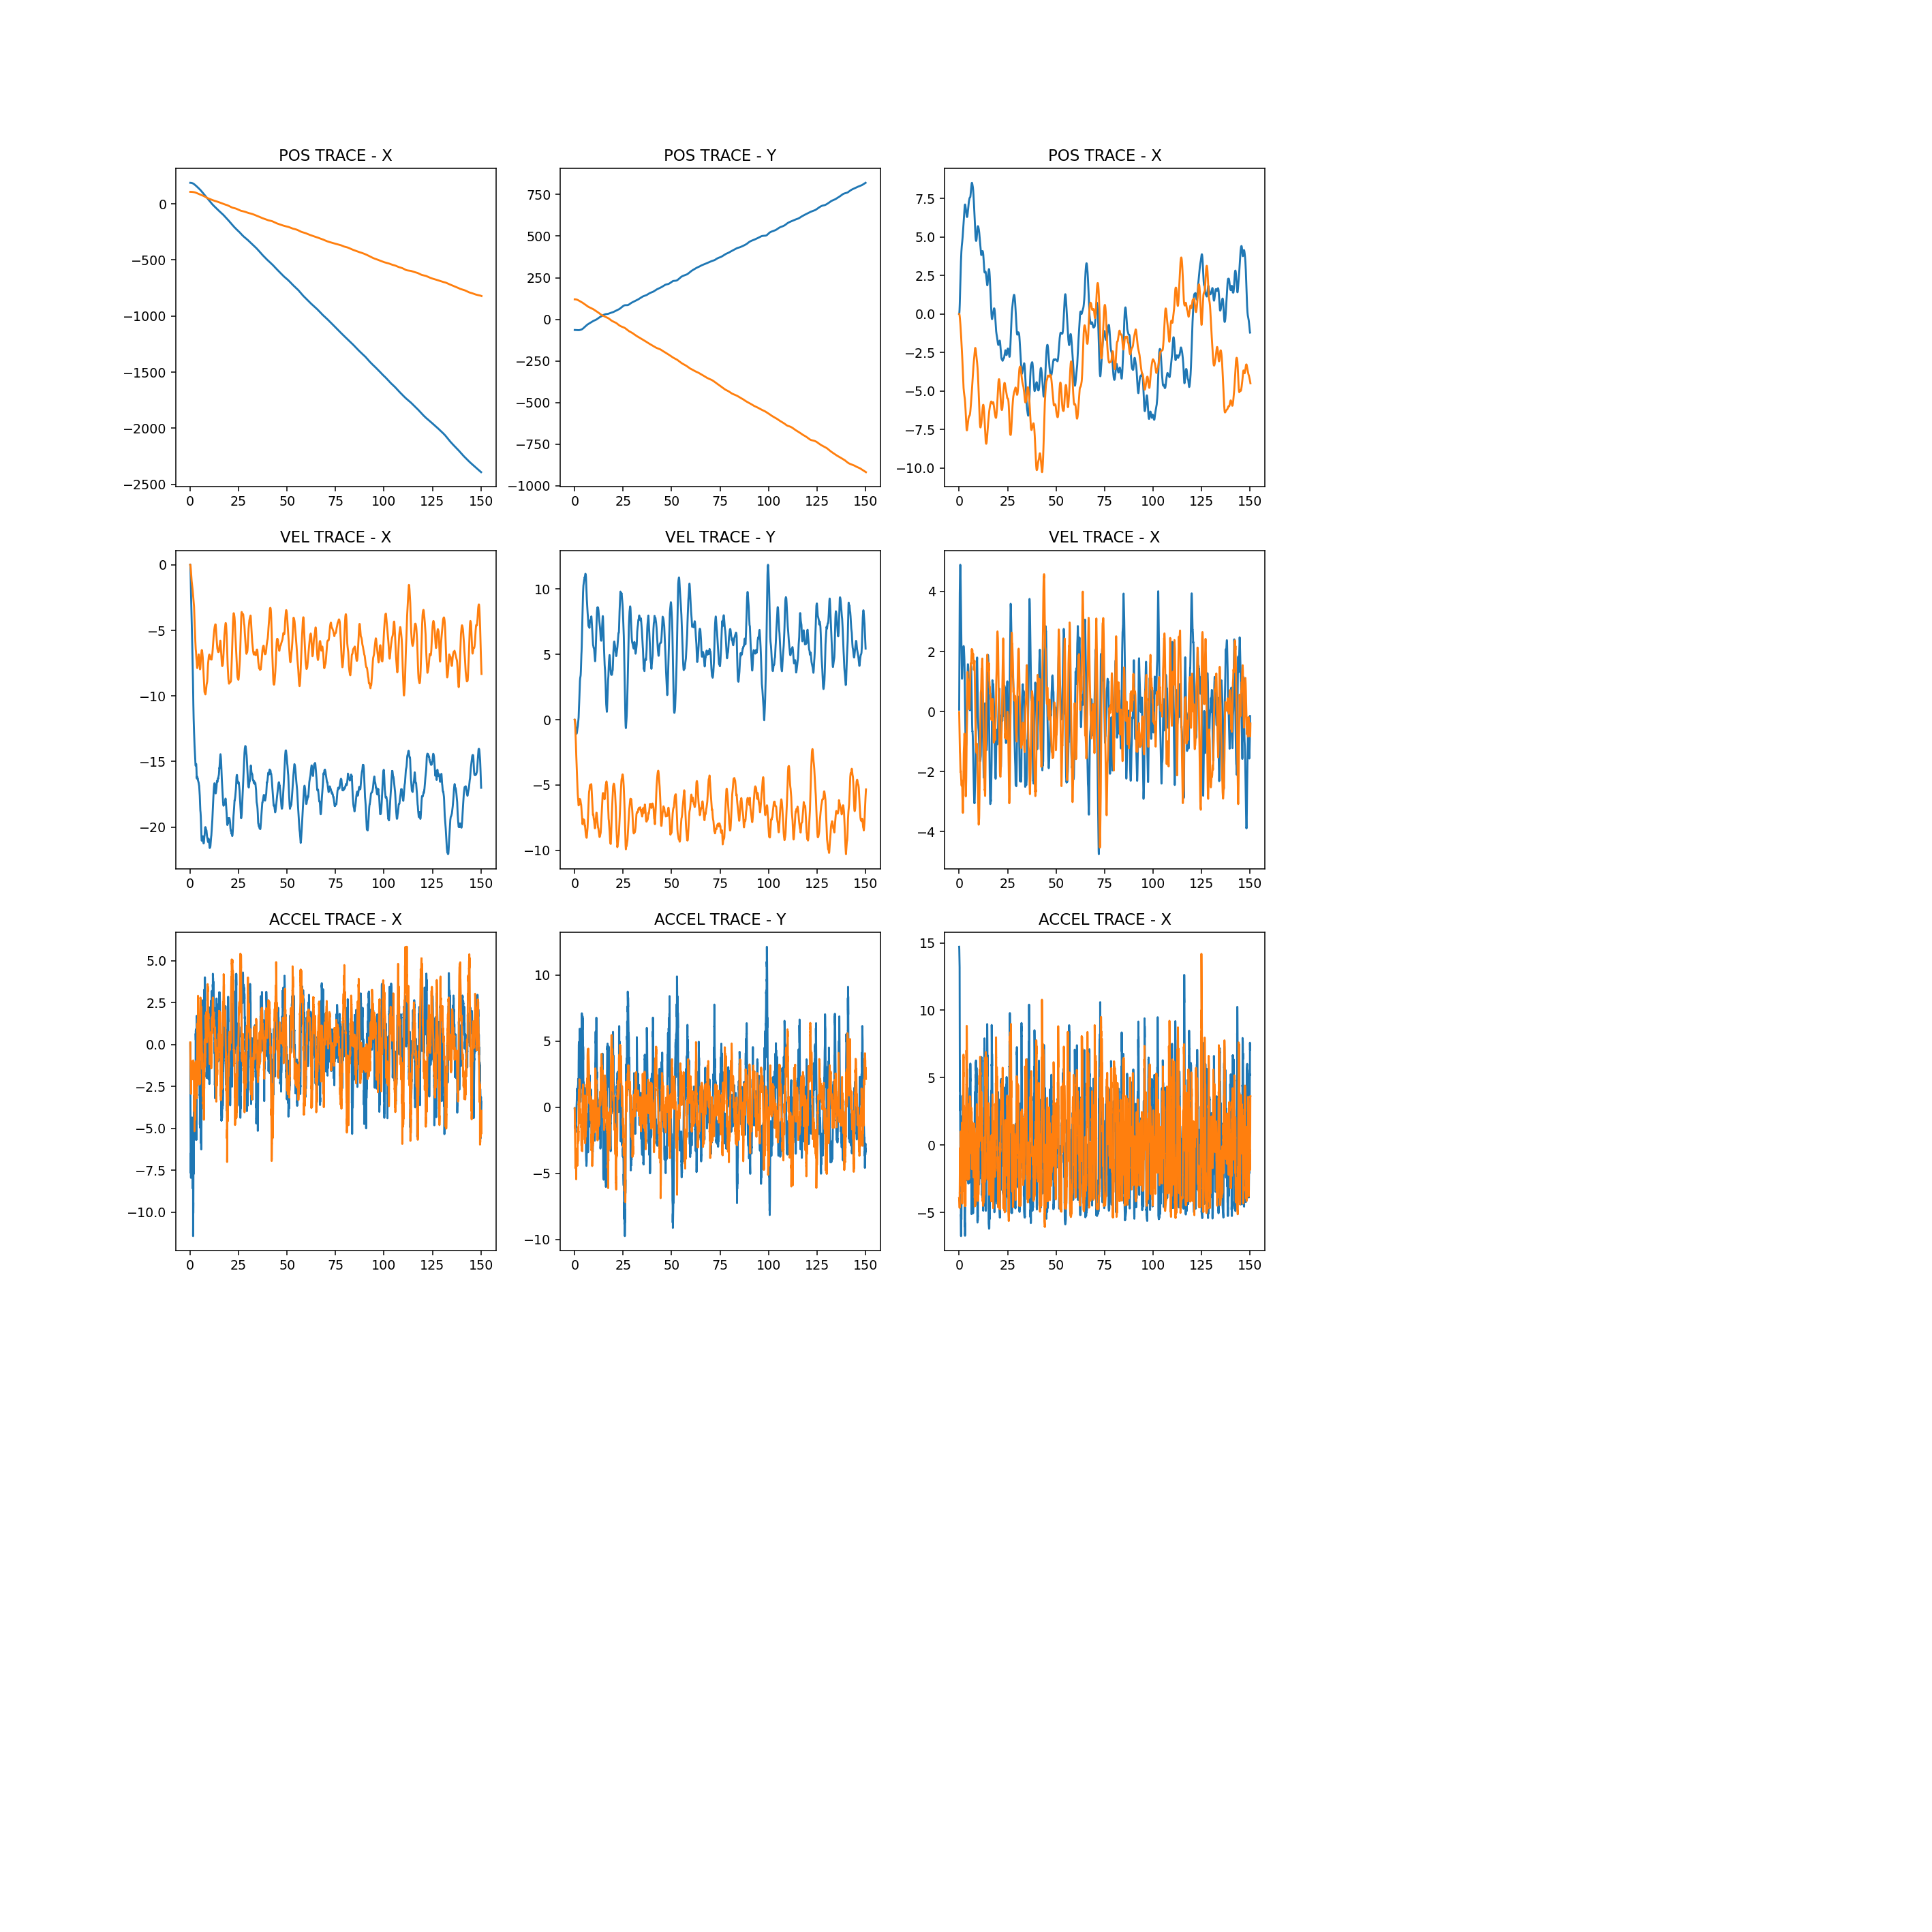

Text(0.5, 1.0, 'ACCEL TRACE - X')

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

axs[0,0].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_pos', 0), label='AC1')
axs[0,0].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_pos', 0), label='AC2')
axs[0,0].set_title('POS TRACE - X')

axs[0,1].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_pos', 1), label='AC1')
axs[0,1].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_pos', 1), label='AC2')
axs[0,1].set_title('POS TRACE - Y')

axs[0,2].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_pos', 2), label='AC1')
axs[0,2].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_pos', 2), label='AC2')
axs[0,2].set_title('POS TRACE - X')

axs[1,0].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_vel', 0), label='AC1')
axs[1,0].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_vel', 0), label='AC2')
axs[1,0].set_title('VEL TRACE - X')

axs[1,1].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_vel', 1), label='AC1')
axs[1,1].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_vel', 1), label='AC2')
axs[1,1].set_title('VEL TRACE - Y')

axs[1,2].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_vel', 2), label='AC1')
axs[1,2].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_vel', 2), label='AC2')
axs[1,2].set_title('VEL TRACE - X')

axs[2,0].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'accel', 0), label='AC1')
axs[2,0].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'accel', 0), label='AC2')
axs[2,0].set_title('ACCEL TRACE - X')

axs[2,1].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'accel', 1), label='AC1')
axs[2,1].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'accel', 1), label='AC2')
axs[2,1].set_title('ACCEL TRACE - Y')

axs[2,2].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'accel', 2), label='AC1')
axs[2,2].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'accel', 2), label='AC2')
axs[2,2].set_title('ACCEL TRACE - X')

<IPython.core.display.Javascript object>


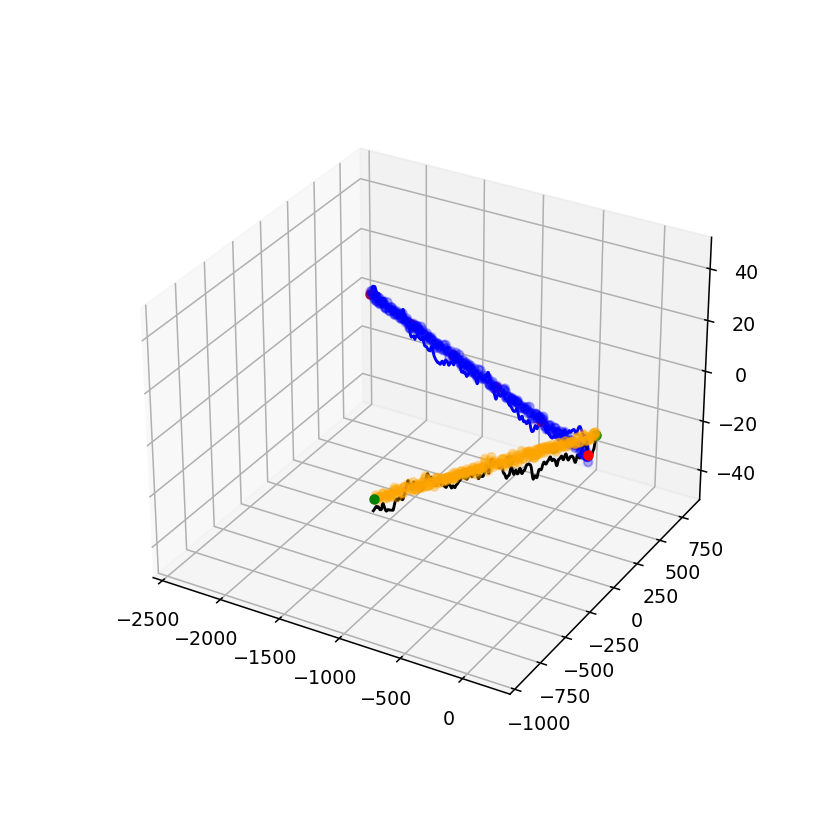

[187.91517727 -64.177406     0.        ]
[-327.74909168  111.93394184    0.        ]
[-843.41336063  288.04528968    0.        ]
[-1359.07762958   464.15663752     0.        ]
[-1874.74189852   640.26798536     0.        ]
[-2390.40616747   816.37933319     0.        ]
[107.36349859 120.07599493   0.        ]
[-78.02326614 -87.26169911   0.        ]
[-263.41003088 -294.59939315    0.        ]
[-448.79679561 -501.93708719    0.        ]
[-634.18356035 -709.27478123    0.        ]
[-819.57032508 -916.61247527    0.        ]


In [6]:
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

ax.plot(extract_from_df(AC1_GT_Trajectory, 'gt_pos', 0), 
           extract_from_df(AC1_GT_Trajectory, 'gt_pos', 1), 
           extract_from_df(AC1_GT_Trajectory, 'gt_pos', 2), c='b')

ax.plot(extract_from_df(AC2_GT_Trajectory, 'gt_pos', 0), 
           extract_from_df(AC2_GT_Trajectory, 'gt_pos', 1), 
           extract_from_df(AC2_GT_Trajectory, 'gt_pos', 2), c='black')

ax.scatter(AC1_Trk_Trajectory[:,2], 
           AC1_Trk_Trajectory[:,3],
           AC1_Trk_Trajectory[:,4], c='b', alpha=0.3)

ax.scatter(AC2_Trk_Trajectory[:,2], 
           AC2_Trk_Trajectory[:,3],
           AC2_Trk_Trajectory[:,4], c='orange', alpha=0.3)

for wpt in AC1_WPTs:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='r')
    print(wpt)

for wpt in AC2_WPTs:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='g')
    print(wpt)


    
# ax.set_xlim(-10, 510)
# ax.set_ylim(-100, 100)
ax.set_zlim(-50,50)

plt.show()

In [ ]:
True & None